In [2]:
!pip3 install essentia

     |████████████████████████████████| 12.0MB 322kB/s 


First Task

Define the Duration and Offset measurement techniques.

We already have the onset detection ideas (HFC,)

Evaluate different onset.

Distances with annotation 


Similarity between Ground Truth (annotations) and the output of the algorithm.

Observations on current alg.

It needs to consider short inter-note interval.

Consider "missing green lines":

Can I find a way to 
numericall assess ag similar to student assessment.





Onset, Offset, Duration Measurements,

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = '/content/drive/Thesis'
query_music_path = '/content/drive/Thesis'

import pandas as pd
import sys
sys.path.append('/content/drive/Thesis')

sys.path.append('/content/drive/MyDrive/Thesis/IDMT-SMT-BASS_SINGLE-TRACKS/audio')
sys.path.append('/content/drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/annotation')




Mounted at /content/drive


In [4]:
import os
from essentia.standard import *
from essentia import Pool, array
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [5]:
from lxml import etree

with open("drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/annotation/002.xml", "rb") as f:
    tree = etree.parse(f)

golden_onsets2 = []
golden_offsets2 = []
# onsets
print("Onsets2:")
for x in tree.getroot().xpath("//onsetSec"):
    golden_onsets2.append(x.text)
# offsets
print("Offsets2:")
for x in tree.getroot().xpath("//offsetSec"):
    golden_offsets2.append(x.text)


with open("drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/annotation/004.xml", "rb") as f:
    tree = etree.parse(f)

golden_onsets4 = []
golden_offsets4 = []
# onsets
print("Onsets4:")
for x in tree.getroot().xpath("//onsetSec"):
    golden_onsets4.append(x.text)
# offsets
print("Offsets4:")
for x in tree.getroot().xpath("//offsetSec"):
    golden_offsets4.append(x.text)


with open("drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/annotation/010.xml", "rb") as f:
    tree = etree.parse(f)
golden_onsets10 = []
golden_offsets10 = []
# onsets
print("Onsets10:")
for x in tree.getroot().xpath("//onsetSec"):
    golden_onsets10.append(x.text)
# offsets
print("Offsets10:")
for x in tree.getroot().xpath("//offsetSec"):
    golden_offsets10.append(x.text)


with open("drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/annotation/012.xml", "rb") as f:
    tree = etree.parse(f)
golden_onsets12 = []
golden_offsets12 = []
# onsets
print("Onsets12:")
for x in tree.getroot().xpath("//onsetSec"):
    golden_onsets12.append(x.text)
# offsets
print("Offsets12:")
for x in tree.getroot().xpath("//offsetSec"):
    golden_offsets12.append(x.text)

Onsets2:
Offsets2:
Onsets4:
Offsets4:
Onsets10:
Offsets10:
Onsets12:
Offsets12:


In [ ]:
from lxml import etree

with open("drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/annotation/002.xml", "rb") as f:
    tree = etree.parse(f)

golden_onsets2 = []
golden_offsets2 = []
# onsets
print("Onsets2:")
for x in tree.getroot().xpath("//onsetSec"):
    golden_onsets2.append(x.text)
# offsets
print("Offsets2:")
for x in tree.getroot().xpath("//offsetSec"):
    golden_offsets2.append(x.text)


with open("drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/annotation/004.xml", "rb") as f:
    tree = etree.parse(f)

golden_onsets4 = []
golden_offsets4 = []
# onsets
print("Onsets4:")
for x in tree.getroot().xpath("//onsetSec"):
    golden_onsets4.append(x.text)
# offsets
print("Offsets4:")
for x in tree.getroot().xpath("//offsetSec"):
    golden_offsets4.append(x.text)


with open("drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/annotation/010.xml", "rb") as f:
    tree = etree.parse(f)
golden_onsets10 = []
golden_offsets10 = []
# onsets
print("Onsets10:")
for x in tree.getroot().xpath("//onsetSec"):
    golden_onsets10.append(x.text)
# offsets
print("Offsets10:")
for x in tree.getroot().xpath("//offsetSec"):
    golden_offsets10.append(x.text)


with open("drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/annotation/012.xml", "rb") as f:
    tree = etree.parse(f)
golden_onsets12 = []
golden_offsets12 = []
# onsets
print("Onsets12:")
for x in tree.getroot().xpath("//onsetSec"):
    golden_onsets12.append(x.text)
# offsets
print("Offsets12:")
for x in tree.getroot().xpath("//offsetSec"):
    golden_offsets12.append(x.text)

Onsets2:
Offsets2:
Onsets4:
Offsets4:
Onsets10:
Offsets10:
Onsets12:
Offsets12:


In [45]:
fs=44100

durInSecs2=3
soundsDir = ''

frameSize = 1024*2
hopSize = 512*2
#fileName = os.path.join(soundsDir, file)

the002 = 'drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/audio/002.wav'
the004 = 'drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/audio/004.wav'
the010 = 'drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/audio/010.wav'
the012 = 'drive/MyDrive/Thesis/IDMT-SMT-BASS-SINGLE-TRACKS/audio/012.wav'

g2 = MonoLoader(filename = the002, sampleRate = fs)()
full_length=int(len(g2)/fs)
print(full_length)
durInSecs=19
g2 =g2[:int(durInSecs * fs)]#let's use only the first 8 seconds of the signals
g2= g2 / np.max(np.abs(g2))

g4 = MonoLoader(filename = the004, sampleRate = fs)()
g4 = g4[:int(durInSecs * fs)]#let's use only the first 8 seconds of the signals
g4=  g4 / np.max(np.abs(g4))

g10 = MonoLoader(filename = the010, sampleRate = fs)()
g10 = g10[:int(durInSecs * fs)]#let's use only the first 8 seconds of the signals
g10=  g10 / np.max(np.abs(g10))

g12 = MonoLoader(filename = the012, sampleRate = fs)()
g12 =g12[:int(durInSecs * fs)]#let's use only the first 8 seconds of the signals
g12= g12 / np.max(np.abs(g12))



19


In [46]:
od1 = OnsetDetection(method='hfc')
od2 = OnsetDetection(method='complex')

# Let's also get the other algorithms we will need, and a pool to store the results
w = Windowing(type = 'hann')
fft = FFT() # this gives us a complex FFT
c2p = CartesianToPolar() # and this turns it into a pair (magnitude, phase)
pool = essentia.Pool()

# Computing onset detection functions.
for frame in FrameGenerator(g2, frameSize = 1024, hopSize = 512):
    mag, phase, = c2p(fft(w(frame)))
    pool.add('features.hfc', od1(mag, phase))
    pool.add('features.complex', od2(mag, phase))

# Phase 2: compute the actual onsets locations
onsets = Onsets()

onsets_hfc = onsets(# this algo expects a matrix, not a vector
                    essentia.array([ pool['features.hfc'] ]),

                    # you need to specify weights, but as there is only a single
                    # function, it doesn't actually matter which weight you give it
                    [ 1 ])

onsets_complex = onsets(essentia.array([ pool['features.complex'] ]), [ 1 ])


In [47]:
print(onsets_complex)

[1.16099771e-02 5.80498874e-02 5.92108846e-01 9.05578256e-01
 1.30031741e+00 1.42802715e+00 1.48607707e+00 1.79954648e+00
 2.14784575e+00 2.44970512e+00 2.63546491e+00 2.69351482e+00
 3.00698423e+00 3.43655324e+00 3.59909296e+00 3.63392282e+00
 3.80807257e+00 3.90095234e+00 4.22603178e+00 4.53950119e+00
 4.84136057e+00 5.34058952e+00 5.67727900e+00 5.96752834e+00
 6.10684824e+00 6.29260778e+00 6.62929726e+00 6.94276667e+00
 7.25623560e+00 7.50004530e+00 7.83673477e+00 8.30113411e+00
 8.44045353e+00 8.70748329e+00 9.00934219e+00 9.33442211e+00
 9.62467098e+00 1.01471205e+01 1.04025393e+01 1.04954195e+01
 1.07856693e+01 1.09017687e+01 1.10178680e+01 1.10759182e+01
 1.14242172e+01 1.17260771e+01 1.20279369e+01 1.22136965e+01
 1.22717457e+01 1.25968256e+01 1.30844440e+01 1.32353745e+01
 1.35024033e+01 1.38042631e+01 1.41293421e+01 1.44428120e+01
 1.52787304e+01 1.55457592e+01 1.57895689e+01 1.58940592e+01
 1.62191391e+01 1.65326080e+01 1.68344669e+01 1.71014957e+01
 1.74381866e+01 1.789097

In [26]:
print(onsets_hfc)

[0.01160998 0.47600907 0.9171882  1.4976871  1.7995465  2.1478457
 2.4497051  2.635465   2.6935148 ]


In [27]:
print(golden_onsets2)

['0', '0.97959', '1.5', '1.8', '2.151', '2.4', '2.7', '3', '3.6', '3.9', '4.2', '4.5', '4.8', '5.7', '6.3', '6.6', '6.9', '7.2', '7.5', '7.8', '8.4', '8.7', '9', '9.3', '9.6', '10.5', '11.0857', '11.4', '11.7', '12', '12.3', '12.6', '13.2', '13.5', '13.8', '14.1', '14.4', '15.3', '15.9', '16.2', '16.5', '16.8', '17.1', '17.4', '18', '18.3', '18.6', '18.9']


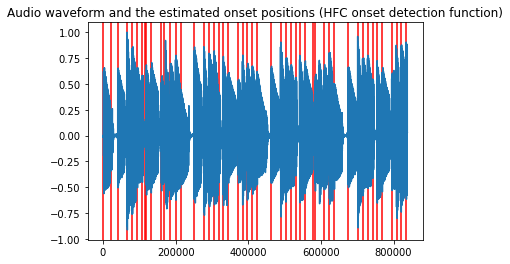

In [48]:
for onset in onsets_hfc:
    plt.axvline(x=onset*44100, color='red')
plt.plot(g2)
plt.title("Audio waveform and the estimated onset positions (HFC onset detection function)")
plt.show()

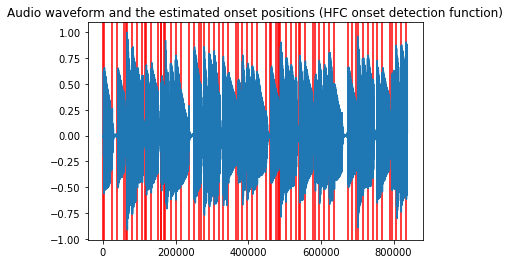

In [49]:
for onset in onsets_complex:
    plt.axvline(x=onset*44100, color='red')
plt.plot(g2)
plt.title("Audio waveform and the estimated onset positions (HFC onset detection function)")
plt.show()

In [ ]:
!pip3 install mir_eval

In [50]:
import mir_eval
from mir_eval import *

In [33]:
!ls

drive  sample_data


In [34]:
!ls /content/drive

MyDrive  Shareddrives


In [51]:
reference_onsets = mir_eval.io.load_events('/content/drive/MyDrive/Thesis/full_onsets_g2.txt')
estimated_hfc_onsets = mir_eval.io.load_events('/content/drive/MyDrive/Thesis/estimated_hfc_g2.txt')
estimated_complex_onsets = mir_eval.io.load_events('/content/drive/MyDrive/Thesis/estimated_complex_g2.txt')


In [62]:
F, P, R = mir_eval.onset.f_measure(reference_onsets, estimated_hfc_onsets)

In [63]:
print(F, P, R )

0.21052631578947367 0.6666666666666666 0.125


In [60]:
F, P, R = mir_eval.onset.f_measure(reference_onsets, estimated_complex_onsets )

In [64]:
print(F, P, R )

0.21052631578947367 0.6666666666666666 0.125


In [66]:

durInSecs=5
g2 =g2[:int(durInSecs * fs)]#let's use only the first 8 seconds of the signals
g2= g2 / np.max(np.abs(g2))


In [70]:

#Setting the parameters
windowSize = 1024
hopSize = 512
startIndexes = np.arange(0, g2.size - windowSize, hopSize, dtype = int)#frame/window start indexes
numWindows = startIndexes.size

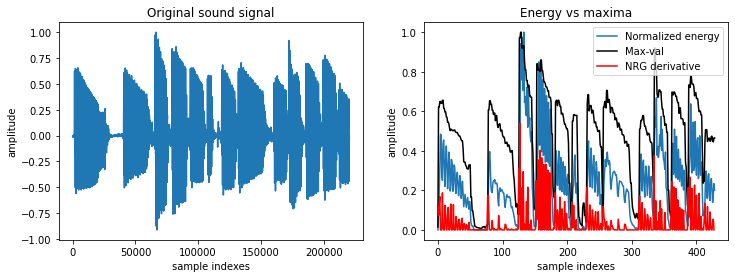

In [72]:
#Plot time-domain signal and the energy signal
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(g2)
plt.title('Original sound signal')
plt.ylabel('amplitude')
plt.xlabel('sample indexes')
plt.axis('tight')


#Your code starts here----------
#Write the code to perform windowing and feature estimation
# - features to be computed: energy and maximum amplitude
# - plot energy and maximum amplitude

NRG = np.zeros_like(startIndexes, dtype = float)#initializing the array for keeping energy values
maxVal = np.zeros_like(startIndexes,dtype = float)#initializing the array for maximum values

#Windowing (use variables: startIndexes and numWindows)

#Windowing (use variables: startIndexes and numWindows)
for k in range(numWindows):
    startInd = startIndexes[k]
    x_win = x[startInd : startInd + windowSize]
    NRG[k] = np.sum(np.power(x_win, 2))
    maxVal[k] = np.max(np.abs(x_win))

#Your code ends here----------

#Let's normalize the arrays for the simplicity of viewing them together
NRG = NRG / np.max(NRG)
maxVal = maxVal / np.max(maxVal)
dervNRG = NRG[1:] - NRG[:-1]#let's also compute the derivative of the energy and plot together
dervNRG[dervNRG < 0] = 0
plt.subplot(1, 2, 2)
plt.plot(NRG,label = 'Normalized energy')
plt.plot(maxVal, 'k', label = 'Max-val')
plt.plot(dervNRG, 'r', label = 'NRG derivative')
plt.title('Energy vs maxima')
plt.ylabel('amplitude')
plt.xlabel('sample indexes')
plt.axis('tight')
plt.legend(loc = 'best')
ipd.Audio(x, rate = fs)

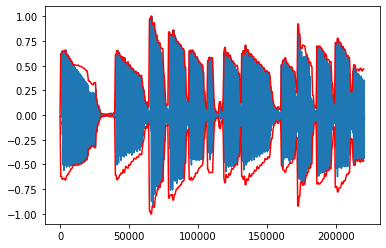

In [73]:
#Optional: Plotting maximum amplitude in sync with the waveform
plt.plot(x)
plt.plot(np.arange(maxVal.size) * (x.size / maxVal.size), maxVal, 'r')
plt.plot(np.arange(maxVal.size) * (x.size / maxVal.size), -maxVal, 'r')